In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error
import scipy.linalg as sla
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
class LinearRegression:
    def __init__(self):
        pass
    
    def fit(self, X, y):
        n, k = X.shape
        X_train = np.hstack((X, np.ones((n, 1))))
        
        self.w = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y
        
    def predict(self, X):
        n, k = X.shape
        X_test = np.hstack((X, np.ones((n, 1))))
        y_pred = X_test @ self.w
        return y_pred
    
    def get_weights(self):
        return self.w

In [9]:
class GradientLinearRegression(LinearRegression):
    def __init__(self):
        super().__init__()
        self.w = None
    
    def fit(self, X, y, lr=1e-15, n_epoch=10):
        n, k = X.shape
        
        if self.w is None:
            self.w = np.random.randn(k + 1)
        
        self.w = [0.0] * (k + 1)
        X_train = np.hstack((X, np.ones((n, 1))))
        
        for iter_num in range(n_epoch):
            y_pred = self.predict(X)

            grad = np.zeros_like(self.w)
            for x, prediction, label in zip(X_train, y_pred, y):
            
                grad += 2 * (prediction - label) * x
            
            grad /= n
            
            self.w -= lr * grad

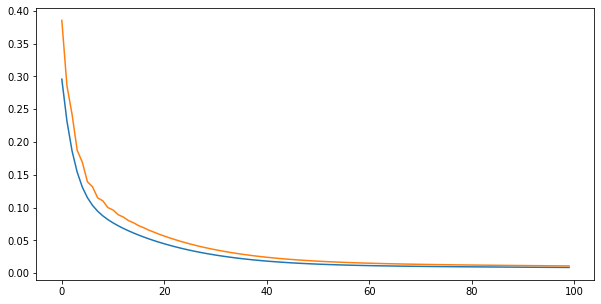

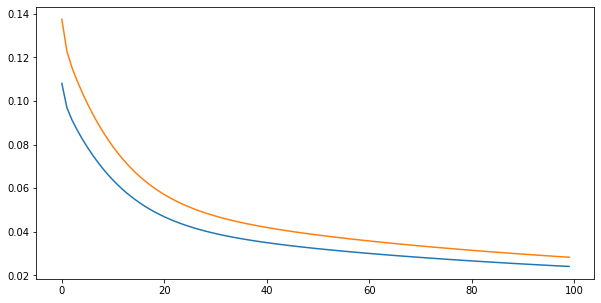

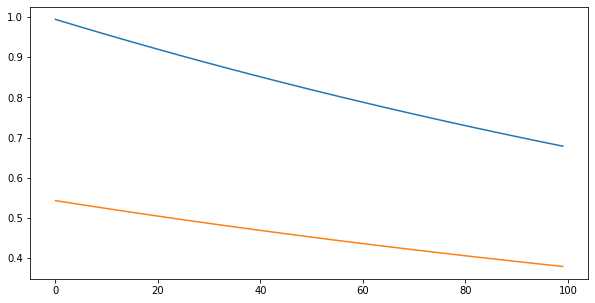

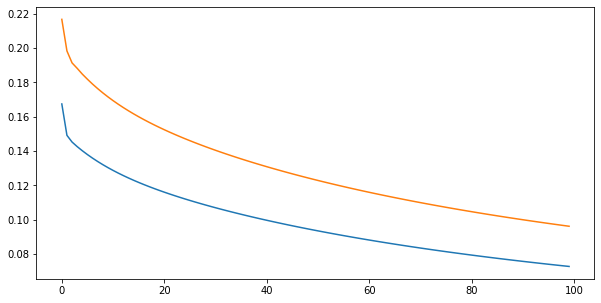

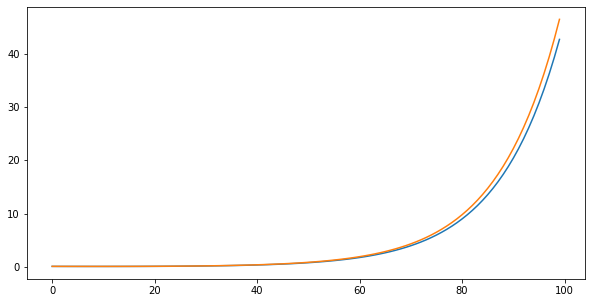

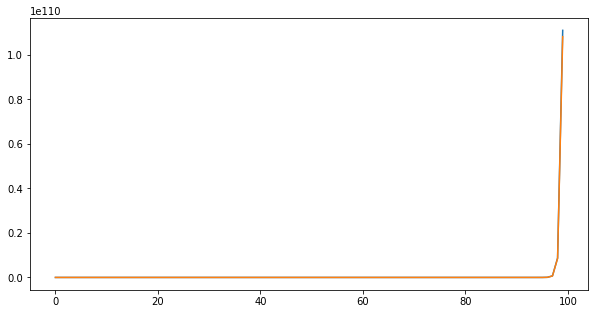

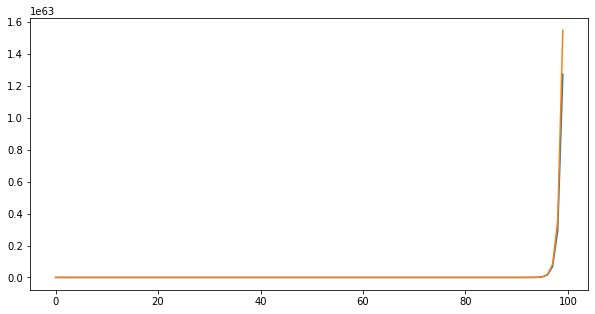

In [10]:
for filenum in range(1, 8):
    X_train, X_test = [], []
    y_train, y_test = [], []
    with open(str(filenum) + '.txt', 'r') as f:
        m = int(f.readline())
        n_train = int(f.readline())
        for i in range(n_train):
            s = list(map(int, f.readline().split()))
            X_train.append(s[:-1])
            y_train.append(s[-1])

        n_test = int(f.readline())
        for i in range(n_test):
            s = list(map(int, f.readline().split()))
            X_test.append(s[:-1])
            y_test.append(s[-1])

    X_train = np.array(X_train)
    X_test = np.array(X_test)
    y_train = np.array(y_train)
    y_test = np.array(y_test)

    regressor = LinearRegression()
    regressor.fit(X_train, y_train)

    train_predictions = regressor.predict(X_train)
    test_predictions = regressor.predict(X_test)

    lr_nrmse_train = mean_squared_error(y_train, train_predictions) ** 0.5 / (max(y_train) - min(y_train))
    lr_nrmse_test = mean_squared_error(y_test, test_predictions) ** 0.5 / (max(y_test) - min(y_test))

    glr_nrmse_train = []
    glr_nrmse_test = []
    for n_epoch in range(1, 101):
        regressor = GradientLinearRegression()
        
        regressor.fit(X_train, y_train, n_epoch=n_epoch) 
        test_predictions = regressor.predict(X_test)
        train_predictions = regressor.predict(X_train)
        
        glr_nrmse_test.append(mean_squared_error(test_predictions, y_test) ** 0.5 / (max(y_test) - min(y_test)))
        glr_nrmse_train.append(mean_squared_error(y_train, train_predictions) ** 0.5 / (max(y_train) - min(y_train)))
    
    plt.figure(figsize=(10, 5))
    plt.plot(glr_nrmse_train, label='glr_train')
    plt.plot(glr_nrmse_test, label='glr_test')
    plt.legend()
    plt.show()